Episode 0: Reward = -100, Steps = 100
Episode 50: Reward = -4, Steps = 15
Episode 100: Reward = -4, Steps = 15
Episode 150: Reward = -2, Steps = 13
Episode 200: Reward = -1, Steps = 12
Episode 250: Reward = -1, Steps = 12
Episode 300: Reward = 0, Steps = 11
Episode 350: Reward = 0, Steps = 11
Episode 400: Reward = 1, Steps = 10
Episode 450: Reward = -2, Steps = 13
Episode 500: Reward = -1, Steps = 12
Episode 550: Reward = 1, Steps = 10
Episode 600: Reward = 0, Steps = 11
Episode 650: Reward = -1, Steps = 12
Episode 700: Reward = -1, Steps = 12
Episode 750: Reward = 1, Steps = 10
Episode 800: Reward = 1, Steps = 10
Episode 850: Reward = -1, Steps = 12
Episode 900: Reward = -2, Steps = 13
Episode 950: Reward = 1, Steps = 10


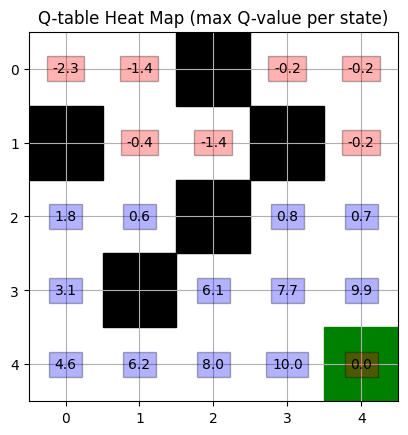

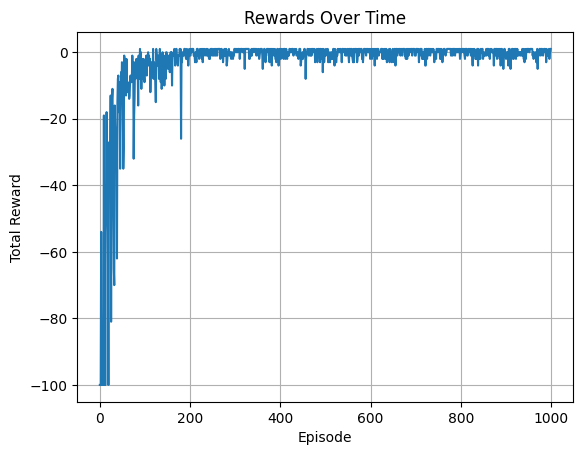

Shortest Path Found:
[(0, 0), (0, 1), (1, 1), (2, 1), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]


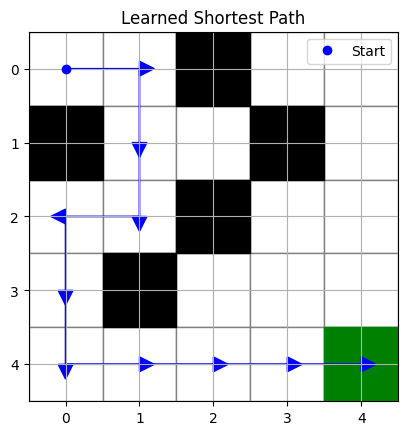

In [28]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Grid size
GRID_SIZE = 5

# Environment setup
goal = (4, 4)
obstacles = [(1, 0),(0, 2), (2, 2), (3, 1), (1, 3)]
actions = ['up', 'down', 'left', 'right']
action_map = {'up': (-1, 0), 'down': (1, 0), 'left': (0, -1), 'right': (0, 1)}

# Q-table
q_table = { (i, j): [0.0]*4 for i in range(GRID_SIZE) for j in range(GRID_SIZE) if (i, j) not in obstacles }

# Hyperparameters
episodes = 1000
lr = 0.1
gamma = 0.9
epsilon = 1.0
epsilon_min = 0.1
decay_rate = 0.99

def move(state, action):
    delta = action_map[action]
    new_state = (state[0] + delta[0], state[1] + delta[1])
    if (0 <= new_state[0] < GRID_SIZE and
        0 <= new_state[1] < GRID_SIZE and
        new_state not in obstacles):
        return new_state
    return state  # invalid move → stay

episode_rewards = []

for ep in range(episodes):
    state = (0, 0)
    total_reward = 0
    steps = 0
    path = [state]

    while state != goal and steps < 100:
        if random.random() < epsilon:
            action_idx = random.randint(0, 3)
        else:
            action_idx = np.argmax(q_table[state])
        action = actions[action_idx]
        next_state = move(state, action)

        reward = 10 if next_state == goal else -1
        total_reward += reward

        if next_state in q_table:
            q_table[state][action_idx] += lr * (
                reward + gamma * np.max(q_table[next_state]) - q_table[state][action_idx]
            )

        state = next_state
        path.append(state)
        steps += 1

    episode_rewards.append(total_reward)
    epsilon = max(epsilon_min, epsilon * decay_rate)

    if ep % 50 == 0:
        print(f"Episode {ep}: Reward = {total_reward}, Steps = {steps}")

# ✅ Visualize Q-table
def plot_q_table():
    fig, ax = plt.subplots()
    for state, q_vals in q_table.items():
        max_q = np.max(q_vals)
        ax.text(state[1], state[0], f"{max_q:.1f}", va='center', ha='center',
                bbox=dict(facecolor='blue' if max_q > 0 else 'red', alpha=0.3))
    for obs in obstacles:
        ax.add_patch(plt.Rectangle((obs[1]-0.5, obs[0]-0.5), 1, 1, color='black'))
    ax.add_patch(plt.Rectangle((goal[1]-0.5, goal[0]-0.5), 1, 1, color='green'))
    ax.set_xlim(-0.5, GRID_SIZE-0.5)
    ax.set_ylim(-0.5, GRID_SIZE-0.5)
    ax.set_title("Q-table Heat Map (max Q-value per state)")
    ax.set_aspect('equal')
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.show()
    
# 🔄 Get shortest path using the learned Q-table
def get_shortest_path(start=(0, 0)):
    state = start
    path = [state]
    steps = 0
    while state != goal and steps < 50:
        if state not in q_table:
            break
        action_idx = np.argmax(q_table[state])
        action = actions[action_idx]
        next_state = move(state, action)
        if next_state == state:  # stuck
            break
        path.append(next_state)
        state = next_state
        steps += 1
    return path

# 🧭 Visualize the shortest path
def plot_path(path):
    fig, ax = plt.subplots()
    
    # Grid layout
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            rect = plt.Rectangle((j-0.5, i-0.5), 1, 1, edgecolor='gray', facecolor='white')
            ax.add_patch(rect)

    # Obstacles
    for obs in obstacles:
        ax.add_patch(plt.Rectangle((obs[1]-0.5, obs[0]-0.5), 1, 1, color='black'))
    
    # Goal
    ax.add_patch(plt.Rectangle((goal[1]-0.5, goal[0]-0.5), 1, 1, color='green'))

    # Path arrows
    for i in range(len(path)-1):
        y1, x1 = path[i]
        y2, x2 = path[i+1]
        ax.arrow(x1, y1, x2-x1, y2-y1, head_width=0.2, head_length=0.2, fc='blue', ec='blue')

    # Start point
    ax.plot(path[0][1], path[0][0], 'bo', label='Start')

    ax.set_xlim(-0.5, GRID_SIZE-0.5)
    ax.set_ylim(-0.5, GRID_SIZE-0.5)
    ax.set_title("Learned Shortest Path")
    ax.set_aspect('equal')
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.legend()
    plt.show()

plot_q_table()

# 📈 Plot reward per episode
plt.plot(episode_rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Rewards Over Time")
plt.grid(True)
plt.show()

shortest_path = get_shortest_path()
print("Shortest Path Found:")
print(shortest_path)
plot_path(shortest_path)
